In [2]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

py.init_notebook_mode(connected=True)

In [3]:
# imprting data 

url = 'https://api.covid19india.org/csv/latest/state_wise_daily.csv'
df = pd.read_csv(url)
df.head()

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0


In [98]:
# Restructure data frame

df1 = pd.melt(df,id_vars=['Date','Status'],var_name='Province/State',value_name='Cases')
df1['Date']=pd.to_datetime(df1['Date'])
df1.head()

,Date,Status,Province/State,Cases
0,2020-03-14,Confirmed,TT,81
1,2020-03-14,Recovered,TT,9
2,2020-03-14,Deceased,TT,2
3,2020-03-15,Confirmed,TT,27
4,2020-03-15,Recovered,TT,4


In [23]:
df2 = df1.pivot_table('Cases',['Date','Province/State'],'Status').reset_index()

In [20]:
df2.head()

Status,Date,Province/State,Confirmed,Deceased,Recovered
0,2020-03-14,AN,0,0,0
1,2020-03-14,AP,1,0,0
2,2020-03-14,AR,0,0,0
3,2020-03-14,AS,0,0,0
4,2020-03-14,BR,0,0,0


In [7]:
print(" Missing Values Present in Columns")
df1.isnull().sum()

 Missing Values Present in Columns


Date              0
Status            0
Province/State    0
Cases             0
dtype: int64

In [8]:
print(" Unique Values Present in Columns")
df1.nunique()

 Unique Values Present in Columns


Date               168
Status               3
Province/State      39
Cases             2376
dtype: int64

In [11]:
# Confirm Cases state wise
Confirmed=df1.loc[df1['Status']=='Confirmed']
x = Confirmed.groupby('Province/State')['Cases'].sum().sort_values(ascending=False).to_frame()
x.style.background_gradient(cmap='Reds')

,Cases
Province/State,
TT,3460375
MH,747995
TN,409238
AP,403616
KA,318752
UP,213824
DL,169412
WB,153754
BR,130848


In [24]:
# Confirm Cases state wise

x = df2.groupby('Province/State')['Confirmed'].sum().sort_values(ascending=False).to_frame()
x.style.background_gradient(cmap='Reds')

,Confirmed
Province/State,
TT,3460375
MH,747995
TN,409238
AP,403616
KA,318752
UP,213824
DL,169412
WB,153754
BR,130848


In [25]:
# Recovered Cases Sate wise

x = df2.groupby('Province/State')['Recovered'].sum().sort_values(ascending=False).to_frame()
x.style.background_gradient(cmap='Reds')

,Recovered
Province/State,
TT,2647438
MH,543170
TN,349682
AP,303711
KA,227019
UP,157879
DL,151473
WB,124332
BR,112445


In [40]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df2['Date'], y=df2['Confirmed'], name='Confirmed',
                         line=dict(color='blue', width=4)))


fig.update_layout(
    title='Corona Virus Trend Confirmed Cases in India',
     yaxis=dict(
        title='Number of Cases Per Day')
    )

fig.show()

In [42]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df2['Date'], y=df2['Recovered'], name='Recovered',
                         line=dict(color='green', width=4)))


fig.update_layout(
    title='Corona Virus Trend Recovered Cases in India',
     yaxis=dict(
        title='Number of Cases Per Day')
    )

fig.show()

In [43]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df2['Date'], y=df2['Deceased'], name='Deceased',
                         line=dict(color='red', width=4)))


fig.update_layout(
    title='Corona Virus Trend Deceased Cases in India',
     yaxis=dict(
        title='Number of Cases Per Day')
    )

fig.show()

In [63]:
df3=df2.groupby('Province/State')[['Confirmed','Recovered']].sum()

In [62]:
df2=df2.loc[df2['Province/State']!='TT']

In [89]:
df4=df3.nlargest(10,'Confirmed').sort_values('Confirmed')
df5=df3.nlargest(10,'Recovered').sort_values('Recovered')

<BarContainer object of 10 artists>

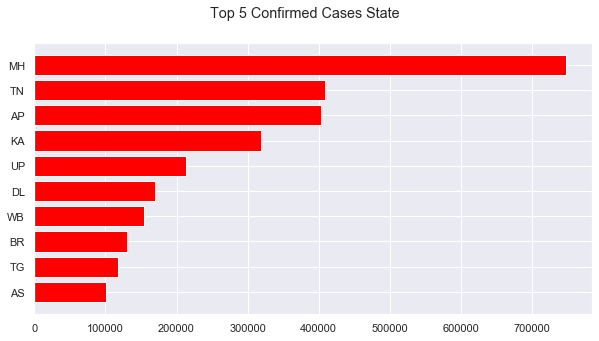

In [90]:
plt.figure(figsize=(10,5))
plt.suptitle('Top 5 Confirmed Cases State')
plt.barh(df4.index,df4.Confirmed,color='red')

<BarContainer object of 10 artists>

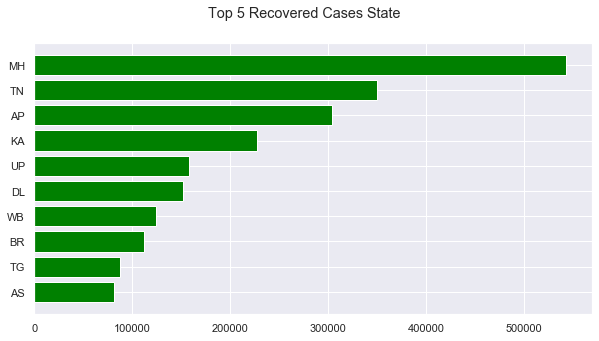

In [91]:
plt.figure(figsize=(10,5))
plt.suptitle('Top 5 Recovered Cases State')
plt.barh(df5.index,df5.Recovered,color='green')

In [ ]:
# Prediction

Prophet
We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends 
are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that 
have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and 
shifts in the trend, and typically handles outliers well. It is also an open source software released by 
Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

Why Prophet?
Prophet is easy to customize and use, and to produce accurate forecasts which can be explained intuitively 
with supporting evidence such as forecast seasonality components. It allows the analyst to explain in an 
intuitive and convinving manner to higher management as to why the forecasts are as such, and the plausible 
underlying factors that contribute to its result. Furthermore, it is also open-source! :)

In [97]:
from fbprophet import Prophet

In [ ]:
# Filtered Cases

In [125]:
Confirmed_df=df1.loc[df1['Status']=='Confirmed']
Confirmed_df = Confirmed_df.drop(columns = ['Status'])
Confirmed_df = Confirmed_df.rename(columns={'Cases': 'Confirmed'})
Confirmed_df=Confirmed_df.loc[Confirmed_df['Province/State']=='DL']
Confirmed_df.head()

,Date,Province/State,Confirmed
5040,2020-03-14,DL,7
5043,2020-03-15,DL,0
5046,2020-03-16,DL,0
5049,2020-03-17,DL,1
5052,2020-03-18,DL,2


In [136]:
print(Confirmed_df['Date'].min(),Confirmed_df['Date'].max())

2020-03-14 00:00:00 2020-08-28 00:00:00


In [130]:
Confirmed_df1=Confirmed_df.loc[Confirmed_df['Date']<'2020-08-10']

In [131]:
Confirmed_df1['Date'].max()

Timestamp('2020-08-09 00:00:00')

In [ ]:
# Prediction for Delhi State

In [132]:
cols =['Date','Confirmed']
Confirmed_df2=Confirmed_df1[cols]

In [149]:
model = Prophet()


Confirmed_df2.columns = ['ds', 'y']
model.fit(Confirmed_df2)

future = model.make_future_dataframe(periods=10,include_history=False)
future.tail()


forecast = model.predict(future)

forecast1 = forecast[['ds', 'yhat']]
forecast1

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat
0,2020-08-10,1175.282133
1,2020-08-11,1307.687948
2,2020-08-12,1370.650263
3,2020-08-13,1393.388402
4,2020-08-14,1402.122326
5,2020-08-15,1391.229351
6,2020-08-16,1320.431842
7,2020-08-17,1100.463204
8,2020-08-18,1232.869019
9,2020-08-19,1295.831334


In [150]:
# Actual Cases for same date

Confirmed_Act=Confirmed_df.loc[(Confirmed_df['Date']>'2020-08-09') & (Confirmed_df['Date']<'2020-08-20')]
Confirmed_Act = Confirmed_Act[cols]
Confirmed_Act.columns = ['ds', 'y']
Confirmed_Act

,ds,y
5487,2020-08-10,707
5490,2020-08-11,1257
5493,2020-08-12,1113
5496,2020-08-13,956
5499,2020-08-14,1192
5502,2020-08-15,1276
5505,2020-08-16,652
5508,2020-08-17,787
5511,2020-08-18,1374
5514,2020-08-19,1398


In [151]:
metric_df = forecast1.set_index('ds')[['yhat']].join(Confirmed_Act.set_index('ds').y).reset_index()

In [152]:
metric_df

,ds,yhat,y
0,2020-08-10,1175.282133,707
1,2020-08-11,1307.687948,1257
2,2020-08-12,1370.650263,1113
3,2020-08-13,1393.388402,956
4,2020-08-14,1402.122326,1192
5,2020-08-15,1391.229351,1276
6,2020-08-16,1320.431842,652
7,2020-08-17,1100.463204,787
8,2020-08-18,1232.869019,1374
9,2020-08-19,1295.831334,1398


In [ ]:
# Accuracy Calculation

In [156]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

In [158]:
rms = sqrt(mean_squared_error(metric_df.y, metric_df.yhat))
rms

333.52594954484607

In [ ]:
# Parameter Tunning

In [161]:
model = Prophet(daily_seasonality=True, weekly_seasonality=True)


Confirmed_df2.columns = ['ds', 'y']
model.fit(Confirmed_df2)

future = model.make_future_dataframe(periods=10,include_history=False)
future.tail()


forecast = model.predict(future)

forecast1 = forecast[['ds', 'yhat']]
forecast1

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,yhat
0,2020-08-10,1157.287723
1,2020-08-11,1295.250660
2,2020-08-12,1360.537302
3,2020-08-13,1383.752861
4,2020-08-14,1392.307966
5,2020-08-15,1387.081035
6,2020-08-16,1298.378265
7,2020-08-17,1078.673827
8,2020-08-18,1216.636764
9,2020-08-19,1281.923406


In [162]:
metric_df = forecast1.set_index('ds')[['yhat']].join(Confirmed_Act.set_index('ds').y).reset_index()
rms = sqrt(mean_squared_error(metric_df.y, metric_df.yhat))
rms

322.807542656058

In [ ]:
# For All 37 Sate

In [ ]:
def make_forecasts(all_countries, confirmed_df, deaths_df, recovered_df, days_to_forecast, first_forecasted_date, mode):
    forecast_dfs = []
    absolute_errors = [] # collate absolute errors so that we can find MAE later on
    counter = 0 # arbitrary counter to output snippet of result_val_df only once, when it is 1
    for country in all_countries:
        try:
            assert(country in confirmed_df['Country'].values)
            print('Country ' + str(country) + ' is listed! ')
            country_confirmed_df = confirmed_df[(confirmed_df['Country'] == country)]
            country_deaths_df = deaths_df[(deaths_df['Country'] == country)]
            country_recovered_df = recovered_df[(recovered_df['Country'] == country)]
            country_dfs = [('Confirmed', country_confirmed_df), 
                           ('Deaths', country_deaths_df), 
                           ('Recovered', country_recovered_df)]
            states_in_country = country_confirmed_df['Province/State'].unique()
            for state in states_in_country:
                try:
                    state_dfs = [] # to store forecasts for Confirmed, Deaths and Recovered

                    assert(state in country_confirmed_df['Province/State'].values)

                    # make forecasts for each case type (Confirmed, Deaths, Recovered)
                    for country_df_tup in country_dfs:
                        case_type = country_df_tup[0]
                        country_df = country_df_tup[1]
                        state_df = country_df[(country_df['Province/State'] == state)]

                        # data preparation for forecast with Prophet at state level
                        state_df = state_df[['Date', case_type]]
                        state_df.columns = ['ds','y']
                        state_df['ds'] = pd.to_datetime(state_df['ds'])

                        state_df_val = state_df[(state_df['ds'] >= pd.to_datetime(first_forecasted_date))] # validation set
                        state_df = state_df[(state_df['ds'] < pd.to_datetime(first_forecasted_date))] # train set

                        if mode == 'default':
                            m = Prophet()
                        elif mode == 'custom':
                            m = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False)
                            m.add_seasonality(name='monthly', period=30.5, fourier_order=10)
                            m.add_seasonality(name='weekly', period=7, fourier_order=21)
                            m.add_seasonality(name='daily', period=1, fourier_order=3)
                        m.fit(state_df)
                        future = m.make_future_dataframe(periods=days_to_forecast)
                        forecast = m.predict(future)

                        # evaluate forecasts with validation set and save absolute errors to absolute_errors
                        forecast_df = forecast[['ds', 'yhat']]
                        result_df = forecast_df[(forecast_df['ds'] >= pd.to_datetime(first_forecasted_date))]
                        result_val_df = result_df.merge(state_df_val, on=['ds'])
                        result_val_df['abs_diff'] = (result_val_df['y'] - result_val_df['yhat']).abs()
                        absolute_errors += list(result_val_df['abs_diff'].values)

                        # the following allows the user to check the output at particular checkpoints. Feel free to change!
                        if counter == 1:
                            print('Printing snippet of result_val_df: \n')
                            print(result_val_df)
                            print(absolute_errors)
                        counter += 1

                        # save results to dataframe
                        forecast_df['Province/State'] = state
                        forecast_df['Country/Region'] = country
                        forecast_df.rename(columns={'yhat':case_type}, inplace=True)
                        state_dfs += [forecast_df.tail(days_to_forecast)]

                    merged_df = state_dfs[0].merge(state_dfs[1],on=['ds', 'Province/State', 'Country/Region']).merge(state_dfs[2],on=['ds', 'Province/State', 'Country/Region'])
                    forecast_dfs += [merged_df]
                except:
                    continue
        except:
            print('Country ' + str(country) + ' is not listed! ')
            continue
    results_tup = namedtuple('results_tup', ['forecast_dfs', 'absolute_errors'])
    return results_tup(forecast_dfs, absolute_errors)